In [1]:
import pandas as pd
import numpy as np


sddata = pd.read_csv('../csv/sandiego_data_by_zipcode.csv',index_col=0)
sddata = sddata.drop(columns='Date Retrieved').fillna(0)
sddata.tail()

sddata.sort_values(sddata.index[-1],axis=1,ascending=False,inplace=True)
sddiff = sddata.diff()
sddiff

,TOTAL,92154,91911,91950,91910,92173,92113,92020,92114,92021,...,92134,92036,92066,91916,91906,92059,92070,92061,92145,92055
Data through,,,,,,,,,,,,,,,,,,,,,
2020-03-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-04-01,117.0,3.0,3.0,1.0,4.0,2.0,2.0,3.0,2.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2020-04-02,146.0,2.0,5.0,6.0,2.0,1.0,5.0,9.0,7.0,10.0,...,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-04-03,97.0,3.0,3.0,1.0,5.0,4.0,3.0,5.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-04-04,117.0,3.0,2.0,1.0,0.0,1.0,3.0,3.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-01,120.0,2.0,6.0,8.0,1.0,1.0,3.0,3.0,1.0,8.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-06-02,124.0,8.0,8.0,6.0,5.0,9.0,5.0,3.0,6.0,2.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-06-03,142.0,2.0,8.0,6.0,13.0,12.0,2.0,4.0,4.0,5.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [2]:
def average_new_cases_per_day(df,end_date,period):
    '''Return series with average number of new cases per day
    
    Inputs:
        df -- the Data Frame
        end_date -- last date of window
        period -- period in days of window
        
    Returns:
        avg_cases_per_day -- pandas Series
        
    '''
    start_date = (pd.Timestamp(end_date)-pd.Timedelta('{} days'.format(period-1))).strftime('%Y-%m-%d')
    weeks_data = sddiff.loc[start_date:end_date]
    
    return weeks_data.mean(0)


avg_ncpd = average_new_cases_per_day(sddiff,sddiff.index[-1],7)
avg_ncpd

TOTAL    137.142857
92154      9.285714
91911      7.571429
91950      6.142857
91910      8.142857
            ...    
92059      0.000000
92070      0.000000
92061      0.000000
92145      0.000000
92055      0.000000
Length: 102, dtype: float64

In [3]:
from numpy.polynomial import polynomial as P
import matplotlib.pyplot as plt
days = np.arange(0,7)
fitfun = lambda cases: P.polyfit(days,cases,1)
fit = sddiff.iloc[-7:,:].apply(fitfun)

fit['fit_coef'] = ['c0','c1']
fit = fit.set_index('fit_coef')

fit

,TOTAL,92154,91911,91950,91910,92173,92113,92020,92114,92021,...,92134,92036,92066,91916,91906,92059,92070,92061,92145,92055
fit_coef,,,,,,,,,,,,,,,,,,,,,
c0,76.821429,5.750000,2.214286,4.750000,2.892857,1.678571,3.75,1.142857,1.607143,3.928571,...,1.428571e-01,0.0,0.0,0.0,0.035714,0.0,0.0,0.0,0.0,0.0
c1,20.107143,1.178571,1.785714,0.464286,1.750000,1.678571,0.75,0.571429,1.035714,0.071429,...,2.856593e-17,0.0,0.0,0.0,0.035714,0.0,0.0,0.0,0.0,0.0


Average increase in new cases per day: -3.25


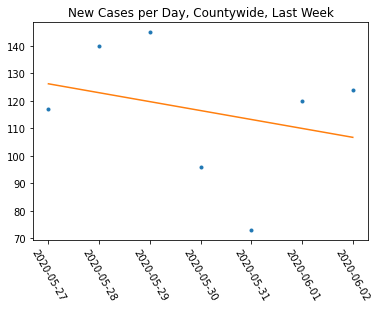

In [4]:
import matplotlib.pyplot as plt

sddiff = sddata.diff()

plt.plot(sddiff.index[-7::],sddiff['TOTAL'].iloc[-7:],'.',sddiff.index[-7::],P.polyval(np.arange(0,7),fit['TOTAL']),'-')
plt.title('New Cases per Day, Countywide, Last Week')
plt.xticks(rotation=-60)
print("Average increase in new cases per day: {:.2f}".format(fit['TOTAL'].c1))


Text(0.5, 1.0, 'histogram of c1')

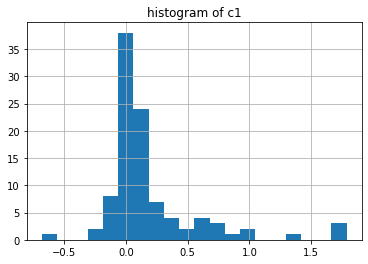

In [4]:

ax = fit.iloc[1,2:].transpose().hist(bins=20)
plt.title('histogram of c1')
#sddiff.iloc[-7:,:]
#plt.plot(x,y,'.',x,P.polyval(x,c[::-1]),'-')



Show zipcodes on a map and colorcode highest c1.

In [6]:
from jdcv19.gis.gis import ZipCodeGIS

gis = ZipCodeGIS(sddata.columns)
zipdf = gis.zipcode_coordinates

In [7]:
df = fit.transpose().join(zipdf)

bins = [-10,-.5,-.25,.25,.5,10]

df['bin'] = pd.cut(df.c1,bins,labels=['decreasing fastest','decreasing','about the same','increasing','increasing fastest'])
df[df.bin=='increasing fastest']

,c0,c1,city,latitude,longitude,bin
92154,5.750000,1.178571,San Diego,32.574398,-117.05633,increasing fastest
91911,2.214286,1.785714,Chula Vista,32.608799,-117.06070,increasing fastest
91910,2.892857,1.750000,Chula Vista,32.638654,-117.06686,increasing fastest
92173,1.678571,1.678571,San Ysidro,32.556264,-117.05057,increasing fastest
92113,3.750000,0.750000,San Diego,32.697402,-117.12001,increasing fastest
92020,1.142857,0.571429,El Cajon,32.799100,-116.97334,increasing fastest
92114,1.607143,1.035714,San Diego,32.706954,-117.05420,increasing fastest
92105,0.678571,0.821429,San Diego,32.741256,-117.09510,increasing fastest
91977,2.000000,1.000000,Spring Valley,32.721145,-116.99612,increasing fastest
92102,3.142857,0.571429,San Diego,32.714992,-117.12537,increasing fastest


In [8]:
colormap = {'decreasing fastest':'blue','decreasing':'green','about the same':'yellow','increasing':'orange','increasing fastest':'red'}
df = df.replace({"bin": colormap})
df = df.rename(columns={'bin': 'color'})
df.index.name = 'zip'
df['color'].to_frame()


,color
zip,
TOTAL,NaN
92154,red
91911,red
91950,orange
91910,red
...,...
92059,yellow
92070,yellow
92061,yellow


Make a map with zipcode centers colored by rate of increase.

In [9]:
from jdcv19.figures.figures import create_map
from bokeh.plotting import output_notebook
from bokeh.io import show

output_notebook()
f = create_map(gis,df['color'].to_frame())
show(f)



Loading BokehJS ...

Plot all zipcodes where c1>=.25.

<ipython-input-13-5db93e6c0767>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
<ipython-input-13-5db93e6c0767>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
<ipython-input-13-5db93e6c0767>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
<ipython-input-13-5db93e6c0767>:2: RuntimeW

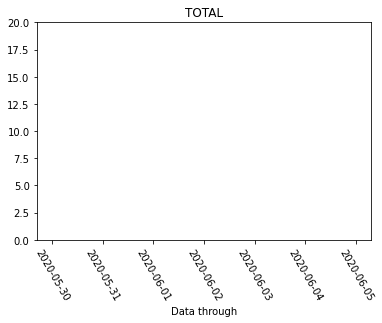

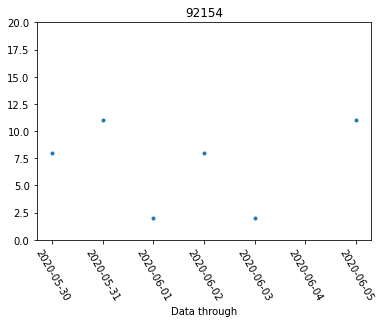

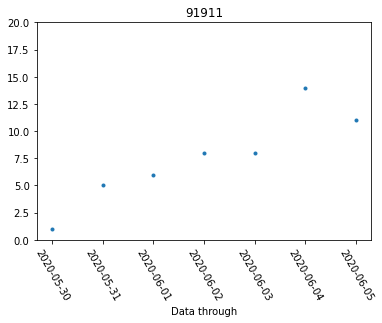

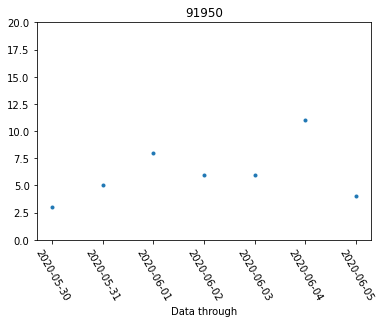

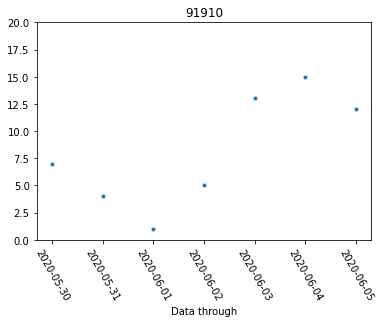

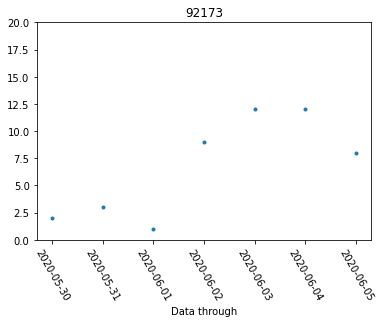

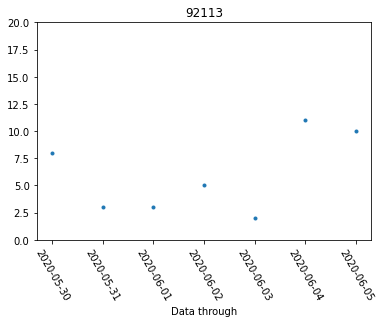

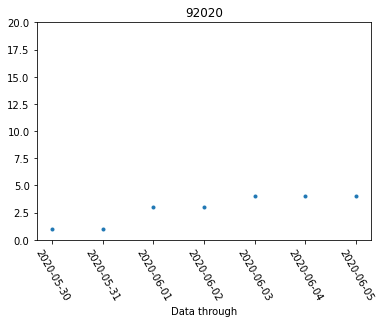

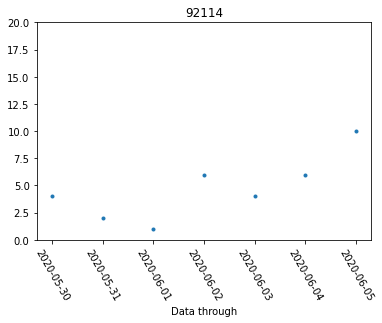

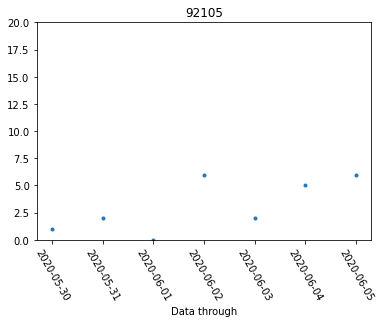

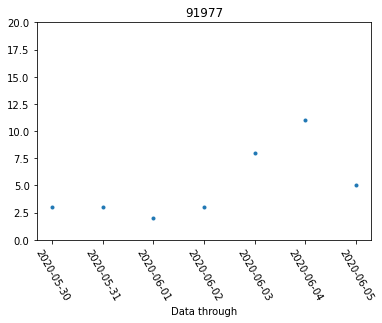

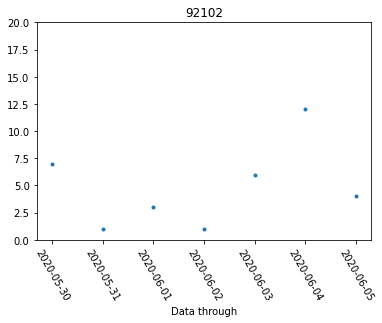

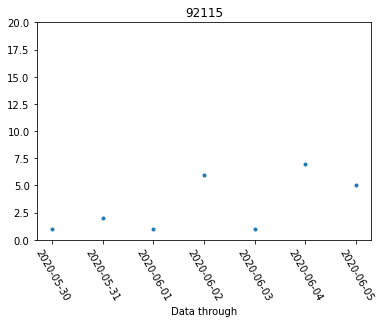

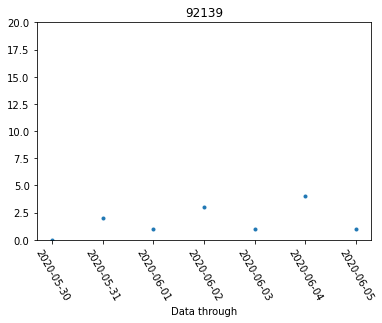

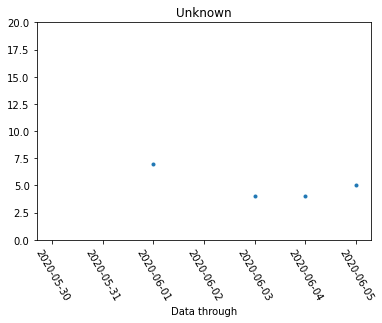

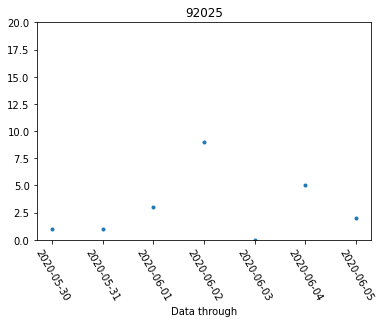

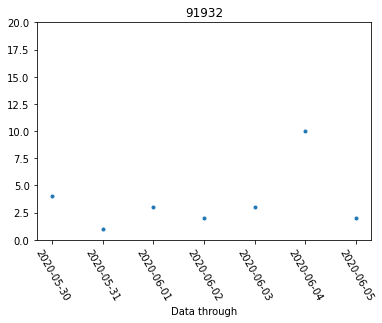

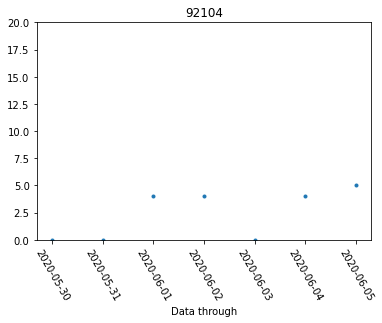

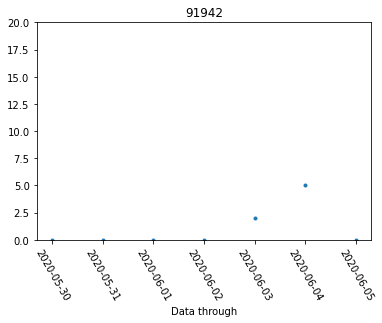

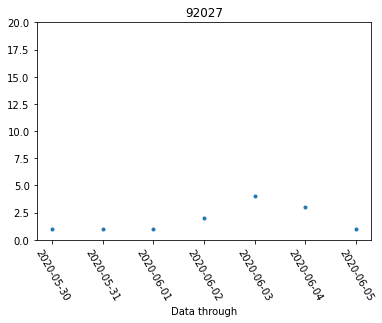

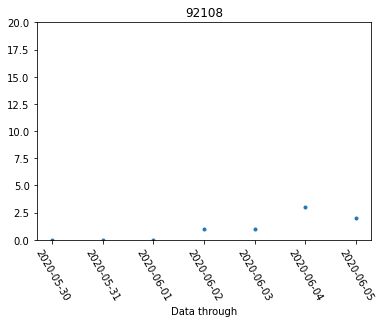

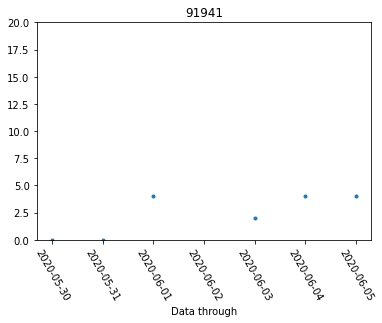

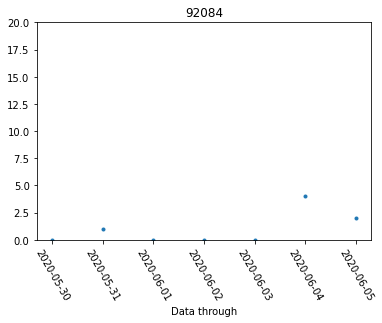

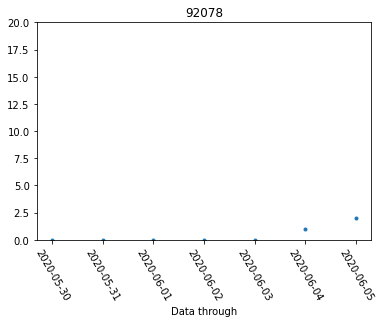

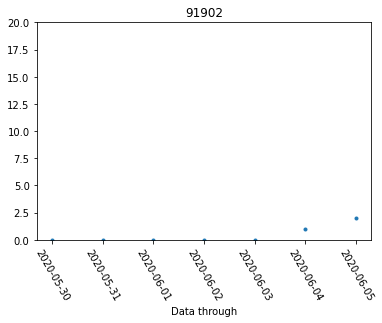

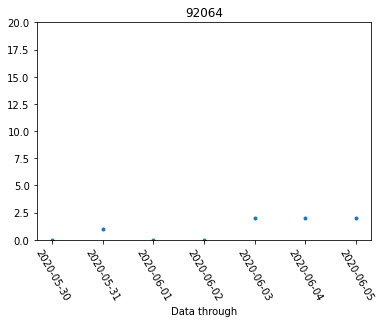

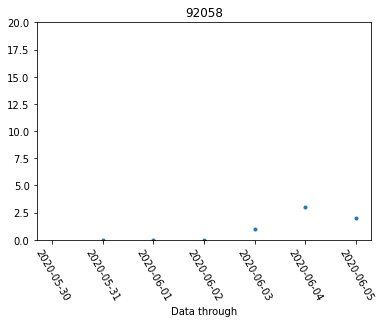

In [13]:
def plot_zipcode(zc):
    plt.figure()
    sddiff.loc[:,zc].iloc[-7:].plot(rot=-60,title=zc,style='.')
    plt.ylim(0,20)


highc1zipcodes = df[df['c1']>=.25].index

for zc in highc1zipcodes:
    plot_zipcode(zc)


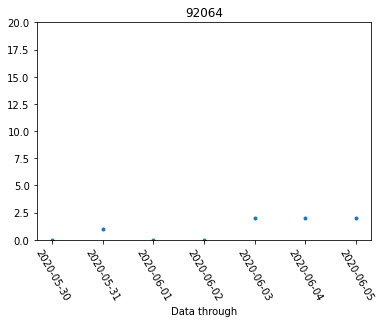

In [19]:
plot_zipcode('92064')